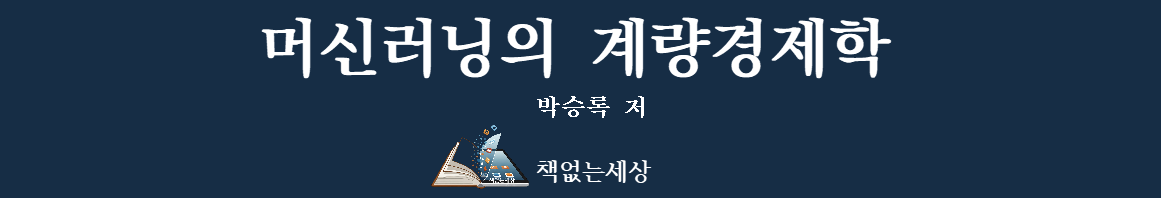

# Part 4: 계량경제학적 평가주제

## Chapter 3. 자기상관(Autocorrelation)

In [3]:
import os  
os.chdir("X:\Econometrics_with_ML")
os.getcwd()

'E:\\JupyterWDirectory\\MyStock'

In [5]:
# exec(open('Functions/Traditional_Econometrics_Lib.py').read())

In [ ]:
# 전통적 계량경제학에서 자주 사용되는 라이브러리(Libraries for the Analysis of Traditional Econometrics)
# Call this file 
# "exec(open('Functions/Traditional_Econometrics_Lib.py').read())"
# "%run –i Functions/Traditional_Econometrics_Lib.py"
# "from Functions.Traditional_Econometrics_Lib import * "
import os
import numpy as np                                       # Numerical calculations
import pandas as pd                                      # Data handling
import math as someAlias
import matplotlib.dates as mdates                        # Turn dates into numbers
import matplotlib.pyplot as plt                          # Lower-level graphics
import patsy as pt
import seaborn as sns
import stargazer as sg
import statsmodels.api as sm
import statsmodels.formula.api as smf                    # Econometrics
import statsmodels.stats.api as sms
import statsmodels.stats.diagnostic as dg
import statsmodels.stats.outliers_influence as smo
import linearmodels as lm                                # Panel model, Simultaneous Eq. Model
import scipy.stats as stats                              # Statistics
import random
from scipy.optimize import Bounds
from scipy.optimize import curve_fit                    # Nonlinear regression
from scipy.optimize import minimize
from scipy.stats import norm
from statsmodels.graphics import tsaplots               # Time series
from statsmodels.iolib.summary2 import summary_col
from statsmodels.stats.anova import anova_lm
from statsmodels.stats.stattools import durbin_watson
from statsmodels.tsa.api import VAR
from statsmodels.tsa.ar_model import AutoReg, ar_select_order
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller          # ADF test
from statsmodels.tsa.stattools import coint             # Cointegration
from statsmodels.tsa.vector_ar.vecm import VECM
from arch import arch_model
import wooldridge as woo
import wbdata
import warnings
warnings.filterwarnings("ignore")

# Korean Fonts
import matplotlib as mpl
mpl.rc('font', family='NanumGothic')
mpl.rc('axes', unicode_minus=False)

In [5]:
import wooldridge as woo
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import patsy as pt

phillips = woo.dataWoo('phillips')
T = len(phillips)
display(phillips)

,year,unem,inf,inf_1,unem_1,cinf,cunem
0,1948,3.8,8.1,NaN,NaN,NaN,NaN
1,1949,5.9,-1.2,8.1,3.8,-9.3,2.100000
2,1950,5.3,1.3,-1.2,5.9,2.5,-0.600000
3,1951,3.3,7.9,1.3,5.3,6.6,-2.000000
4,1952,3.0,1.9,7.9,3.3,-6.0,-0.300000
5,1953,2.9,0.8,1.9,3.0,-1.1,-0.100000
6,1954,5.5,0.7,0.8,2.9,-0.1,2.600000
7,1955,4.4,-0.4,0.7,5.5,-1.1,-1.100000
8,1956,4.1,1.5,-0.4,4.4,1.9,-0.300000
9,1957,4.3,3.3,1.5,4.1,1.8,0.200000


In [6]:
# 연도변수 인덱스
df = phillips[['year', 'unem', 'inf']]
date_range = pd.date_range(start='1948', periods=T, freq='Y')
df.index = date_range.year

# 차분변수 생성
df['inflation'] =  df['inf']
df['inflation_d'] = df['inflation'].diff()

# 1) Expectations-augmented Phillips curve 추정
reg_ea = smf.ols(formula='inflation_d ~ unem', data=df)
results_ea = reg_ea.fit()
display(results_ea.summary())

# 잔차의 AR(1)함수 추정
df['resid_ea'] = results_ea.resid
df['resid_ea_lag1'] = df['resid_ea'].shift(1)
reg = smf.ols(formula='resid_ea ~ resid_ea_lag1', data=df)
results = reg.fit()
display(results.summary())

# 2) Static Phillips curve 추정
reg_s = smf.ols(formula= 'inflation ~ unem', data=df)
results_s = reg_s.fit()
display(results_s.summary())

# 잔차 AR(1) 
df['resid_s'] = results_s.resid
df['resid_s_lag1'] = df['resid_s'].shift(1)
reg = smf.ols(formula='resid_s ~ resid_s_lag1', data=df)
results = reg.fit()
display(results.summary())

# 더빈-왓슨 검정(DW tests)
DW_ea = sm.stats.stattools.durbin_watson(results_ea.resid)
DW_s = sm.stats.stattools.durbin_watson(results_s.resid)
print(f'DW_ea: {DW_ea}\n')
print(f'DW_s: {DW_s}\n')

# 브로슈-갓프리 검정(Breusch Godfrey test)
bg_result_ea = sm.stats.diagnostic.acorr_breusch_godfrey(results_ea, nlags=3)
fstat_ea = bg_result_ea[2]
fpval_ea = bg_result_ea[3]
print(f'fstat_ea: {fstat_ea}\n')
print(f'fpval_ea: {fpval_ea}\n')

bg_result_s = sm.stats.diagnostic.acorr_breusch_godfrey(results_s, nlags=3)
fstat_s = bg_result_s[2]
fpval_s = bg_result_s[3]
print(f'fstat_s: {fstat_s}\n')
print(f'fpval_s: {fpval_s}\n')


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            inflation_d   R-squared:                       0.104
Model:                            OLS   Adj. R-squared:                  0.087
Method:                 Least Squares   F-statistic:                     6.132
Date:                Mon, 21 Jul 2025   Prob (F-statistic):             0.0165
Time:                        21:34:49   Log-Likelihood:                -123.00
No. Observations:                  55   AIC:                             250.0
Df Residuals:                      53   BIC:                             254.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.8282      1.225      2.309      0.025       0.371       5.285
unem          -0.5176      0.209     -2.476      0.017      -0.937      -0.098
==============================================================================
Omnibus:                       25.286   Durbin-Watson:                   1.771
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               71.207
Skew:                          -1.193   Prob(JB):                     3.45e-16
Kurtosis:                       8.038   Cond. No.                         23.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               resid_ea   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                 -0.018
Method:                 Least Squares   F-statistic:                   0.07896
Date:                Mon, 21 Jul 2025   Prob (F-statistic):              0.780
Time:                        21:34:49   Log-Likelihood:                -111.69
No. Observations:                  54   AIC:                             227.4
Df Residuals:                      52   BIC:                             231.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         0.1674      0.265      0.631      0.531      -0.365       0.700
resid_ea_lag1    -0.0327      0.116     -0.281      0.780      -0.266       0.201
==============================================================================
Omnibus:                       10.669   Durbin-Watson:                   1.833
Prob(Omnibus):                  0.005   Jarque-Bera (JB):               28.017
Skew:                          -0.208   Prob(JB):                     8.25e-07
Kurtosis:                       6.504   Cond. No.                         2.28
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              inflation   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.045
Method:                 Least Squares   F-statistic:                     3.579
Date:                Mon, 21 Jul 2025   Prob (F-statistic):             0.0639
Time:                        21:34:49   Log-Likelihood:                -139.43
No. Observations:                  56   AIC:                             282.9
Df Residuals:                      54   BIC:                             286.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.0536      1.548      0.681      0.499      -2.050       4.157
unem           0.5024      0.266      1.892      0.064      -0.030       1.035
==============================================================================
Omnibus:                       13.468   Durbin-Watson:                   0.801
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               14.302
Skew:                           1.138   Prob(JB):                     0.000784
Kurtosis:                       3.976   Cond. No.                         23.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                resid_s   R-squared:                       0.345
Model:                            OLS   Adj. R-squared:                  0.333
Method:                 Least Squares   F-statistic:                     27.91
Date:                Mon, 21 Jul 2025   Prob (F-statistic):           2.43e-06
Time:                        21:34:49   Log-Likelihood:                -124.21
No. Observations:                  55   AIC:                             252.4
Df Residuals:                      53   BIC:                             256.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -0.1118      0.318     -0.352      0.727      -0.750       0.526
resid_s_lag1     0.5725      0.108      5.283      0.000       0.355       0.790
==============================================================================
Omnibus:                        9.076   Durbin-Watson:                   1.359
Prob(Omnibus):                  0.011   Jarque-Bera (JB):               18.913
Skew:                           0.236   Prob(JB):                     7.82e-05
Kurtosis:                       5.834   Cond. No.                         2.93
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

DW_ea: 1.7710206131002448

DW_s: 0.8014823206513213

fstat_ea: 3.887568182432086

fpval_ea: 0.014195586240447592

fstat_s: 14.786862707664847

fpval_s: 4.721865042018041e-07



In [7]:
# 코크레인-오컷 추정법Cochrane-Orcutt estimation)
# 1) Expectations-augmented Phillips curve의 CORC 추정
y, X = pt.dmatrices('inflation_d ~ unem', data=df, return_type='dataframe')
reg = sm.GLSAR(y, X)
CORC_results_ea = reg.iterative_fit(maxiter=100)
display(CORC_results_ea.summary())
print(CORC_results_ea.summary())

# 2) Static Phillips curve의 CORC 추정
y, X = pt.dmatrices('inflation ~ unem', data=df, return_type='dataframe')
reg = sm.GLSAR(y, X)
CORC_results_s = reg.iterative_fit(maxiter=100)
display(CORC_results_s.summary())
print(CORC_results_s.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                           GLSAR Regression Results                           
==============================================================================
Dep. Variable:            inflation_d   R-squared:                       0.135
Model:                          GLSAR   Adj. R-squared:                  0.119
Method:                 Least Squares   F-statistic:                     8.143
Date:                Mon, 21 Jul 2025   Prob (F-statistic):            0.00619
Time:                        21:34:58   Log-Likelihood:                -111.68
No. Observations:                  54   AIC:                             227.4
Df Residuals:                      52   BIC:                             231.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.8350      1.006      2.818      0.007       0.816       4.854
unem          -0.4904      0.172     -2.854      0.006      -0.835      -0.146
==============================================================================
Omnibus:                       10.146   Durbin-Watson:                   1.839
Prob(Omnibus):                  0.006   Jarque-Bera (JB):               25.945
Skew:                          -0.156   Prob(JB):                     2.32e-06
Kurtosis:                       6.381   Cond. No.                         23.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

                           GLSAR Regression Results                           
Dep. Variable:            inflation_d   R-squared:                       0.135
Model:                          GLSAR   Adj. R-squared:                  0.119
Method:                 Least Squares   F-statistic:                     8.143
Date:                Mon, 21 Jul 2025   Prob (F-statistic):            0.00619
Time:                        21:34:58   Log-Likelihood:                -111.68
No. Observations:                  54   AIC:                             227.4
Df Residuals:                      52   BIC:                             231.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.8350      1.006      2.818      0.0

<class 'statsmodels.iolib.summary.Summary'>
"""
                           GLSAR Regression Results                           
==============================================================================
Dep. Variable:              inflation   R-squared:                       0.093
Model:                          GLSAR   Adj. R-squared:                  0.076
Method:                 Least Squares   F-statistic:                     5.436
Date:                Mon, 21 Jul 2025   Prob (F-statistic):             0.0236
Time:                        21:34:58   Log-Likelihood:                -118.95
No. Observations:                  55   AIC:                             241.9
Df Residuals:                      53   BIC:                             245.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.3837      2.224      3.321      0.002       2.924      11.844
unem          -0.6850      0.294     -2.331      0.024      -1.274      -0.096
==============================================================================
Omnibus:                        9.225   Durbin-Watson:                   1.626
Prob(Omnibus):                  0.010   Jarque-Bera (JB):               19.725
Skew:                          -0.230   Prob(JB):                     5.21e-05
Kurtosis:                       5.897   Cond. No.                         12.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

                           GLSAR Regression Results                           
Dep. Variable:              inflation   R-squared:                       0.093
Model:                          GLSAR   Adj. R-squared:                  0.076
Method:                 Least Squares   F-statistic:                     5.436
Date:                Mon, 21 Jul 2025   Prob (F-statistic):             0.0236
Time:                        21:34:58   Log-Likelihood:                -118.95
No. Observations:                  55   AIC:                             241.9
Df Residuals:                      53   BIC:                             245.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.3837      2.224      3.321      0.0

In [8]:
# 뉴이-웨스트 표준오차(Newey-West Standard error)
# 1) Expectations-augmented Phillips curve의 CORC 추정
y, X = pt.dmatrices('inflation_d ~ unem', data=df, return_type='dataframe')
reg_ea = sm.GLSAR(y, X)
# HAC SE
results_hac_ea = reg_ea.fit(cov_type='HAC', cov_kwds={'maxlags': 2})
print(results_hac_ea.summary())

# 2) Static Phillips curve의 CORC 추정
y, X = pt.dmatrices('inflation ~ unem', data=df, return_type='dataframe')
reg_s = sm.GLSAR(y, X)
# HAC SE
results_hac_s = reg_s.fit(cov_type='HAC', cov_kwds={'maxlags': 2})
print(results_hac_s.summary())

                           GLSAR Regression Results                           
Dep. Variable:            inflation_d   R-squared:                       0.133
Model:                          GLSAR   Adj. R-squared:                  0.116
Method:                 Least Squares   F-statistic:                     5.947
Date:                Mon, 21 Jul 2025   Prob (F-statistic):             0.0182
Time:                        21:35:04   Log-Likelihood:                -111.72
No. Observations:                  54   AIC:                             227.4
Df Residuals:                      52   BIC:                             231.4
Df Model:                           1                                         
Covariance Type:                  HAC                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.8962      1.272      2.277      0.0

### 라. ARCH(Autoregressive Conditional Heteroscedasticity)

In [ ]:
import numpy as np
import pandas as pd
import pandas_datareader as pdr
import statsmodels.formula.api as smf
import yfinance as yf

# 야후에서 KOSPI, S&P 주가 다운로드
assets = ['^KS11', '^GSPC']
start = '2010-01-01'
end = '2024-6-30'

data = yf.download(assets, start=start, end=end)  
data = data.loc[:, ('Adj Close')]  
data.columns = assets  
data.columns = ['KOSPI','SNP500']
display(data)

# KOSPI 주가 수익율
data['ret'] = np.log(data['KOSPI']).diff()
data['ret_lag1'] = data['ret'].shift(1)

# AR(1) model for returns:
reg = smf.ols(formula='ret ~ ret_lag1', data=data)
results = reg.fit()

# squared residuals:
data['resid_sq'] = results.resid ** 2
data['resid_sq_lag1'] = data['resid_sq'].shift(1)

# model for squared residuals:
ARCHreg = smf.ols(formula='resid_sq ~ resid_sq_lag1', data=data)
results_ARCH = ARCHreg.fit()
display(results_ARCH.summary())

# Chapter 4: 회귀모형 추정 결과의 리포트

In [11]:
import statsmodels.formula.api as smf
import numpy as np
import wooldridge as woo
from stargazer.stargazer import Stargazer

# 데이터 불러오기
hprice1 = woo.dataWoo('hprice1')

# 모형 1: 수준 변수
reg1 = smf.ols(formula = 'price ~ lotsize + sqrft + bdrms', data=hprice1)
results1 = reg1.fit()

# 모형 2: 로그 변환 변수
reg2 = smf.ols(formula = 'price ~ np.log(lotsize) + np.log(sqrft) + bdrms', data=hprice1)
results2 = reg2.fit()

# 모형 3: 포괄적 모형
reg3 = smf.ols(formula = 'price ~ lotsize + sqrft + bdrms + np.log(lotsize) + np.log(sqrft)', data=hprice1)
results3 = reg3.fit()

# Stargazer를 이용한 표 생성
stargazer = Stargazer([results1, results2, results3])

# 표의 제목 설정 (선택사항)
stargazer.title("Housing Price Regression Results")

# text 형식
display(stargazer)

# html 형식
result_html = stargazer.render_html()
display(result_html)

# Latex 형식
result_latex = stargazer.render_latex()
display(result_latex) 

'Housing Price Regression Results<br><table style="text-align:center"><tr><td colspan="4" style="border-bottom: 1px solid black"></td></tr>\n<tr><td style="text-align:left"></td><td colspan="3"><em>Dependent variable: price</em></td></tr><tr><td style="text-align:left"></td><tr><td style="text-align:left"></td><td>(1)</td><td>(2)</td><td>(3)</td></tr>\n<tr><td colspan="4" style="border-bottom: 1px solid black"></td></tr>\n\n<tr><td style="text-align:left">Intercept</td><td>-21.770<sup></sup></td><td>-2026.417<sup>***</sup></td><td>1283.502<sup></sup></td></tr>\n<tr><td style="text-align:left"></td><td>(29.475)</td><td>(209.336)</td><td>(958.426)</td></tr>\n<tr><td style="text-align:left">bdrms</td><td>13.853<sup></sup></td><td>19.351<sup>**</sup></td><td>15.728<sup>*</sup></td></tr>\n<tr><td style="text-align:left"></td><td>(9.010)</td><td>(8.849)</td><td>(8.390)</td></tr>\n<tr><td style="text-align:left">lotsize</td><td>0.002<sup>***</sup></td><td></td><td>-0.001<sup></sup></td></tr>\

'\\begin{table}[!htbp] \\centering\n  \\caption{Housing Price Regression Results}\n\\begin{tabular}{@{\\extracolsep{5pt}}lccc}\n\\\\[-1.8ex]\\hline\n\\hline \\\\[-1.8ex]\n& \\multicolumn{3}{c}{\\textit{Dependent variable: price}} \\\n\\cr \\cline{2-4}\n\\\\[-1.8ex] & (1) & (2) & (3) \\\\\n\\hline \\\\[-1.8ex]\n Intercept & -21.770$^{}$ & -2026.417$^{***}$ & 1283.502$^{}$ \\\\\n& (29.475) & (209.336) & (958.426) \\\\\n bdrms & 13.853$^{}$ & 19.351$^{**}$ & 15.728$^{*}$ \\\\\n& (9.010) & (8.849) & (8.390) \\\\\n lotsize & 0.002$^{***}$ & & -0.001$^{}$ \\\\\n& (0.001) & & (0.001) \\\\\n np.log(lotsize) & & 61.457$^{***}$ & 63.516$^{***}$ \\\\\n& & (12.304) & (19.824) \\\\\n np.log(sqrft) & & 224.973$^{***}$ & -273.382$^{*}$ \\\\\n& & (29.849) & (138.538) \\\\\n sqrft & 0.123$^{***}$ & & 0.231$^{***}$ \\\\\n& (0.013) & & (0.063) \\\\\n\\hline \\\\[-1.8ex]\n Observations & 88 & 88 & 88 \\\\\n $R^2$ & 0.672 & 0.678 & 0.725 \\\\\n Adjusted $R^2$ & 0.661 & 0.666 & 0.708 \\\\\n Residual Std. Er